In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import scatter
from sympy import *
import tensorflow as tf

In [196]:
x = np.array([0.12, 0.23, 0.45, 0.55, 0.6, 0.87, 0.97])
y = np.array([0, 0, 1, 1, 1, 0, 0])

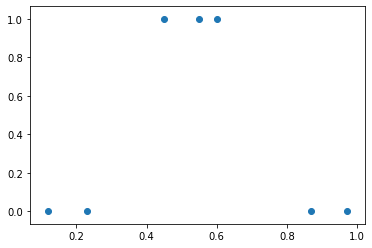

In [197]:
scatter(x, y)

In [102]:
tf.zeros(1, dtype=tf.float32)

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>

In [158]:
#w_1 = tf.Variable(tf.random.normal((1,1)).numpy()[0][0], name='w_1')
#w_2 = tf.Variable(tf.random.normal((1,1)).numpy()[0][0], name='w_2')
#w_3 = tf.Variable(tf.random.normal((1,1)).numpy()[0][0], name='w_3')
#w_4 = tf.Variable(tf.random.normal((1,1)).numpy()[0][0], name='w_4')
#b_1 = tf.Variable(0.0, name='b_1')
#b_2 = tf.Variable(0.0, name='b_2')
#b_3 = tf.Variable(0.0, name='b_3')
#x = 2
#y = 3
#with tf.GradientTape(persistent=True, watch_accessed_variables=True) as tape:
#    #tape.watch(w_1)
#    l = (y - (tf.math.log(1+np.e**(w_1*x+b_1))*w_3+tf.math.log(1+np.e**(w_2*x+b_2))*w_4+b_3))**2
#    #l = tf.math.log(np.e**w_1+2*w_2)
#tape.gradient(l, w_1)

<tf.Tensor: shape=(), dtype=float32, numpy=-9.129102>

In [163]:
#w_1 = tf.Variable(tf.random.normal((1,1)), name='w_1').numpy()[0][0]
#w_2 = tf.Variable(tf.random.normal((1,1)), name='w_2').numpy()[0][0]
#w_3 = tf.Variable(tf.random.normal((1,1)), name='w_3').numpy()[0][0]
#w_4 = tf.Variable(tf.random.normal((1,1)), name='w_4').numpy()[0][0]
#b_1 = tf.Variable(tf.zeros(1, dtype=tf.float32), name='b_1').numpy()[0]
#b_2 = tf.Variable(tf.zeros(1, dtype=tf.float32), name='b_2').numpy()[0]
#b_3 = tf.Variable(tf.zeros(1, dtype=tf.float32), name='b_3').numpy()[0]

In [219]:
def total_gradient(w_1, w_2, w_3, w_4, b_1, b_2, b_3, x, y):
    w_1 = tf.Variable(w_1, name='w_1')
    w_2 = tf.Variable(w_2, name='w_2')
    w_3 = tf.Variable(w_3, name='w_3')
    w_4 = tf.Variable(w_4, name='w_4')
    b_1 = tf.Variable(b_1, name='b_1')
    b_2 = tf.Variable(b_2, name='b_2')
    b_3 = tf.Variable(b_3, name='b_3')
    l = 0
    with tf.GradientTape(persistent=True) as tape:
        for i in range(7):
            l = l + (y[i] - (max(w_1*x[i]+b_1, 0)*w_3+max(w_2*x[i]+b_2, 0)*w_4+b_3))**2
    
    return (tape.gradient(l, w_1).numpy(), tape.gradient(l, w_2).numpy(), tape.gradient(l, w_3).numpy(), tape.gradient(l, w_4).numpy(), tape.gradient(l, b_1).numpy(), tape.gradient(l, b_2).numpy(), tape.gradient(l, b_3).numpy())

In [167]:
#total_gradient(w_1, w_2, w_3, w_4, b_1, b_2, b_3, x, y)

(1.917913, 1.7887306, -14.651384, -56.89087, 4.13853, 3.38473, -59.273376)

In [220]:
w_1 = tf.Variable(tf.random.normal((1,1)), name='w_1').numpy()[0][0]
w_2 = tf.Variable(tf.random.normal((1,1)), name='w_2').numpy()[0][0]
w_3 = tf.Variable(tf.random.normal((1,1)), name='w_3').numpy()[0][0]
w_4 = tf.Variable(tf.random.normal((1,1)), name='w_4').numpy()[0][0]
b_1 = tf.Variable(tf.zeros(1, dtype=tf.float32), name='b_1').numpy()[0]
b_2 = tf.Variable(tf.zeros(1, dtype=tf.float32), name='b_2').numpy()[0]
b_3 = tf.Variable(tf.zeros(1, dtype=tf.float32), name='b_3').numpy()[0]
n = 1
while True:
    step = total_gradient(w_1, w_2, w_3, w_4, b_1, b_2, b_3, x, y)
    print("iter" + str(n))
    print(step)
    new_w_1 = w_1 - 0.01*step[0]
    new_w_2 = w_2 - 0.01*step[1]
    new_w_3 = w_3 - 0.01*step[2]
    new_w_4 = w_4 - 0.01*step[3]
    new_b_1 = b_1 - 0.01*step[4]
    new_b_2 = b_2 - 0.01*step[5]
    new_b_3 = b_3 - 0.01*step[6]
    if sum([abs(i) for i in step]) < 0.001 or n == 1000:
        break
    w_1 = new_w_1
    w_2 = new_w_2
    w_3 = new_w_3
    w_4 = new_w_4
    b_1 = new_b_1
    b_2 = new_b_3
    b_3 = new_b_3
    n = n + 1

iter1
(15.023231, 11.137701, -18.066484, -17.125336, 23.077469, 17.108835, -22.430145)
iter2
(7.80233083495128, 5.438817099976377, -6.785280751159516, -12.876509415669862, 11.813391590985288, 8.219067736282144, -13.895120986978373)
iter3
(5.000790478859002, 2.9312751759242373, -2.994962892516398, -9.828207696436587, 7.763644353398416, 4.393550289624875, -9.494592679987763)
iter4
(3.3838646209653858, 1.586708012081431, -1.2151244990590986, -7.177522714801689, 5.470341187194002, 2.323290487408529, -6.374605276551746)
iter5
(1.8610318958183185, 0.872823452017928, -0.42064294956853016, -5.064565885560498, 2.9324589699466577, 1.231499201016565, -4.207591563529671)
iter6
(0.7142474069456403, 0.5041286925356696, -0.08588579686053431, -3.5432731070437153, 1.144727877585706, 0.6685967603907629, -2.762346748048609)
iter7
(0.41183275293094895, 0.31373712477312965, 0.04871224960416891, -2.5252473126507615, 0.777987943652086, 0.3790735236074456, -1.8347593440757648)
iter8
(0.2016826264159874, 0.203

In [221]:
(new_w_1, new_w_2, new_w_3, new_w_4, new_b_1, new_b_2, new_b_3)

(2.284305607955459,
 1.8516390607844266,
 -2.4732489542725395,
 1.591957831211546,
 -1.2009325529990598,
 -0.17396648872871254,
 -0.17390815700964565)

In [233]:
def f1(x):
    return max(new_w_1*x+new_b_1, 0)*new_w_3
def f2(x):
    return max(new_w_2*x+new_b_2, 0)*new_w_4
def f3(x):
    return max(new_w_1*x+new_b_1, 0)*new_w_3 + max(new_w_2*x+new_b_2, 0)*new_w_4 + new_b_3

In [234]:
s1 = [f1(i) for i in a]
s2 = [f2(i) for i in a]
s3 = [f3(i) for i in a]

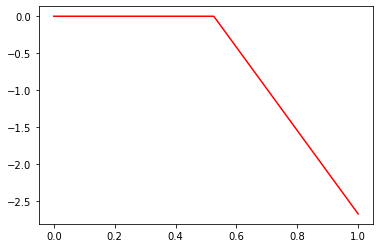

In [236]:
a = np.linspace(0, 1, 100)
plt.plot(a, s1, color='red')

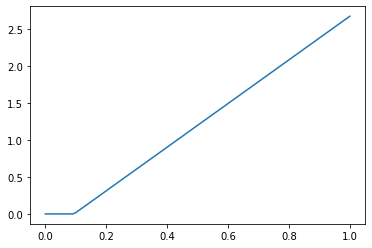

In [237]:
plt.plot(a, s2)

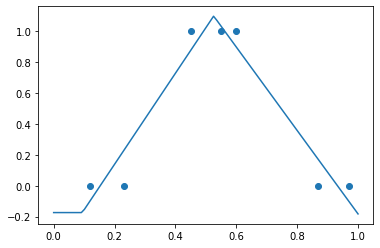

In [240]:
scatter(x, y)
plt.plot(a, s3)